# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# !pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# url = f'https://api.openweathermap.org/data/2.5/weather?q=London&appid={weather_api_key}'

# response = requests.get(url)
# print(response.json())

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 285.34, 'feels_like': 284.91, 'temp_min': 283.31, 'temp_max': 286.86, 'pressure': 999, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 230, 'gust': 12.35}, 'clouds': {'all': 75}, 'dt': 1679481382, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1679464774, 'sunset': 1679508922}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 613


['new norfolk',
 'sentyabrskiy',
 'airai',
 'san patricio',
 'isiro',
 'hambantota',
 'norrtalje',
 'mareeba',
 'hilo',
 'ribeira grande',
 'saint-leu',
 'fort nelson',
 'dargaville',
 'cape town',
 'bethel',
 'la ronge',
 'tasiilaq',
 'punta arenas',
 'vaini',
 'coihaique',
 'jamestown',
 'festus',
 'rikitea',
 'chokurdakh',
 'carutapera',
 'chulym',
 'labuan',
 'kapaa',
 'vizinga',
 'puerto ayora',
 'lyngseidet',
 'bocsig',
 'bluff',
 'camargo',
 'khasan',
 'san joaquin',
 'mindelo',
 'virden',
 'kodiak',
 'yumen',
 'mastung',
 'vaitupu',
 'purpe',
 'manaia',
 'chuy',
 'kijang',
 'mys shmidta',
 'avarua',
 'grindavik',
 'watsa',
 'cagayan de tawi-tawi',
 'ushuaia',
 'hasaki',
 'albany',
 'bathsheba',
 'puerto escondido',
 'arraial do cabo',
 'castro',
 'hithadhoo',
 'thompson',
 'yerbogachen',
 'fairbanks',
 'tomatlan',
 'tapiramuta',
 'carnarvon',
 'busselton',
 'port alfred',
 'mataura',
 'fasa',
 'mar del plata',
 'bafata',
 'barentsburg',
 'kimbe',
 'illoqqortoormiut',
 'varhaug'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # reate endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | isiro
Processing Record 6 of Set 1 | hambantota
Processing Record 7 of Set 1 | norrtalje
Processing Record 8 of Set 1 | mareeba
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | saint-leu
Processing Record 12 of Set 1 | fort nelson
Processing Record 13 of Set 1 | dargaville
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | la ronge
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | coihaique
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | festus
Proc

Processing Record 34 of Set 4 | northam
Processing Record 35 of Set 4 | kandrian
Processing Record 36 of Set 4 | bilma
Processing Record 37 of Set 4 | victoria
Processing Record 38 of Set 4 | nouadhibou
Processing Record 39 of Set 4 | dzerzhinsk
Processing Record 40 of Set 4 | tura
Processing Record 41 of Set 4 | gawler
Processing Record 42 of Set 4 | waipawa
Processing Record 43 of Set 4 | walvis bay
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | lakes entrance
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | kahului
Processing Record 48 of Set 4 | shingu
Processing Record 49 of Set 4 | zyryanka
Processing Record 0 of Set 5 | hamilton
Processing Record 1 of Set 5 | chokwe
Processing Record 2 of Set 5 | esperance
Processing Record 3 of Set 5 | maragogi
Processing Record 4 of Set 5 | saint-pierre
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | senmonorom
City not found. Skipping...
Processing Record 7 of Set 

Processing Record 24 of Set 8 | mandan
Processing Record 25 of Set 8 | manzil jamil
City not found. Skipping...
Processing Record 26 of Set 8 | galle
Processing Record 27 of Set 8 | dauriya
Processing Record 28 of Set 8 | qandahar
City not found. Skipping...
Processing Record 29 of Set 8 | naftah
City not found. Skipping...
Processing Record 30 of Set 8 | codrington
Processing Record 31 of Set 8 | sao felix do xingu
Processing Record 32 of Set 8 | sao sebastiao
Processing Record 33 of Set 8 | fuerte olimpo
Processing Record 34 of Set 8 | nalut
Processing Record 35 of Set 8 | mujiayingzi
Processing Record 36 of Set 8 | tari
Processing Record 37 of Set 8 | okitipupa
Processing Record 38 of Set 8 | mantua
Processing Record 39 of Set 8 | kuningan
Processing Record 40 of Set 8 | falealupo
City not found. Skipping...
Processing Record 41 of Set 8 | obo
Processing Record 42 of Set 8 | keti bandar
Processing Record 43 of Set 8 | cooma
Processing Record 44 of Set 8 | pitsunda
Processing Record 

Processing Record 8 of Set 12 | sola
Processing Record 9 of Set 12 | katangli
Processing Record 10 of Set 12 | naushki
Processing Record 11 of Set 12 | yirol
City not found. Skipping...
Processing Record 12 of Set 12 | neman
Processing Record 13 of Set 12 | la asuncion
Processing Record 14 of Set 12 | loukhi
Processing Record 15 of Set 12 | vilhena
Processing Record 16 of Set 12 | harper
Processing Record 17 of Set 12 | lasa
Processing Record 18 of Set 12 | cairns
Processing Record 19 of Set 12 | roma
Processing Record 20 of Set 12 | wiwili
Processing Record 21 of Set 12 | quatre cocos
Processing Record 22 of Set 12 | male
Processing Record 23 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 24 of Set 12 | bukachacha
Processing Record 25 of Set 12 | north bend
Processing Record 26 of Set 12 | kralendijk
Processing Record 27 of Set 12 | nigde
Processing Record 28 of Set 12 | tungkang
City not found. Skipping...
Processing Record 29 of Set 12 | wote
Processing Record 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,13.72,67,100,0.37,AU,1679482143
1,airai,-8.9266,125.4092,16.28,97,100,0.35,TL,1679482145
2,san patricio,28.0170,-97.5169,21.05,92,100,6.79,US,1679482146
3,isiro,2.7739,27.6160,31.94,36,100,0.87,CD,1679482147
4,hambantota,6.1241,81.1185,31.19,74,40,3.60,LK,1679482148


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,13.72,67,100,0.37,AU,1679482143
1,airai,-8.9266,125.4092,16.28,97,100,0.35,TL,1679482145
2,san patricio,28.0170,-97.5169,21.05,92,100,6.79,US,1679482146
3,isiro,2.7739,27.6160,31.94,36,100,0.87,CD,1679482147
4,hambantota,6.1241,81.1185,31.19,74,40,3.60,LK,1679482148


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

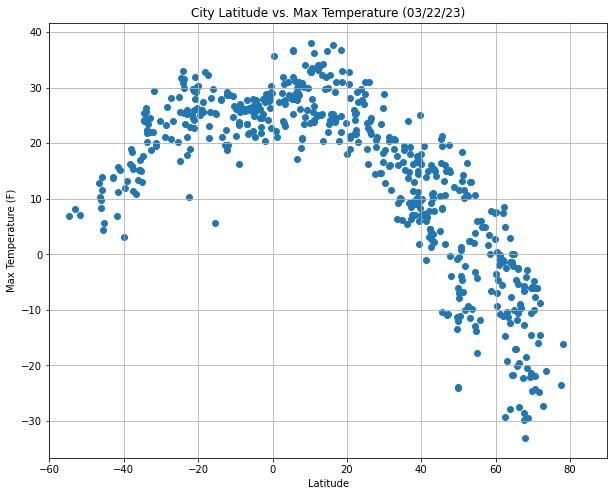

In [25]:
# Build scatter plot for latitude vs. temperature
# Extract the data to plot
latitudes = [city['Lat'] for city in city_data]
temperatures = [city['Max Temp'] for city in city_data]

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(latitudes, temperatures, marker="o")

# Set the chart title and labels for the x and y axes
ax.set_title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")

# Set the x axis limits
ax.set_xlim(-60, 90)

# Incorporate other graph properties (optional)
ax.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

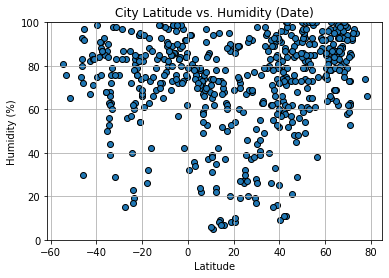

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Set the title and labels for the scatter plot
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the y limits of the scatter plot
plt.ylim(0, 100)

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

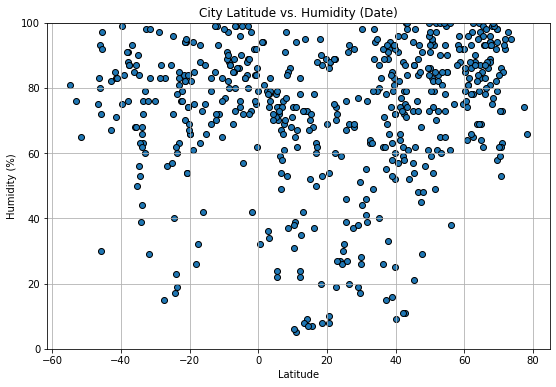

In [26]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Set the title and labels for the scatter plot
ax.set_title("City Latitude vs. Humidity (Date)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")

# Set the y limits of the scatter plot
ax.set_ylim(0, 100)

# Incorporate the other graph properties
ax.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

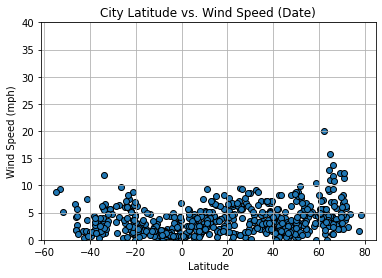

<Figure size 720x432 with 0 Axes>

In [27]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Set the title and labels for the scatter plot
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the y limits of the scatter plot
plt.ylim(0, 40)

# Incorporate the other graph properties
plt.grid(True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    
    # Run linear regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line y-values from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line in a string format
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # Set x and y axis labels, title and grid
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0,:]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,san patricio,28.0170,-97.5169,21.05,92,100,6.79,US,1679482146
3,isiro,2.7739,27.6160,31.94,36,100,0.87,CD,1679482147
4,hambantota,6.1241,81.1185,31.19,74,40,3.60,LK,1679482148
5,norrtalje,59.7580,18.7050,7.46,92,100,4.42,SE,1679482149
7,hilo,19.7297,-155.0900,23.68,89,100,3.09,US,1679482151


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0,:]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,13.72,67,100,0.37,AU,1679482143
1,airai,-8.9266,125.4092,16.28,97,100,0.35,TL,1679482145
6,mareeba,-17.0000,145.4333,23.02,88,51,0.87,AU,1679482150
9,saint-leu,-21.1500,55.2833,29.48,94,27,3.62,RE,1679482152
11,dargaville,-35.9333,173.8833,15.17,68,65,3.38,NZ,1679482155


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7751719456444651


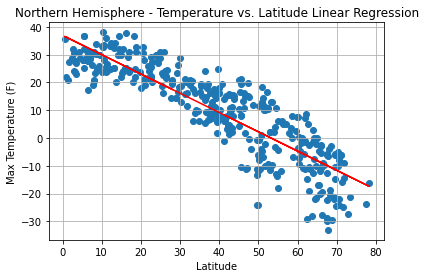

In [31]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (F)', 'Northern Hemisphere - Temperature vs. Latitude Linear Regression', (0,-40))


The r-squared is: 0.4141104182473896


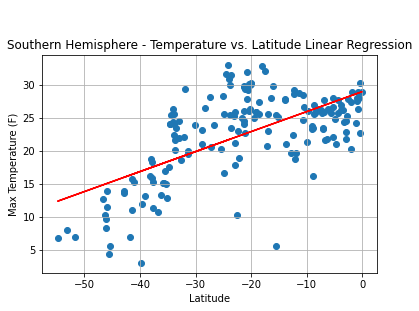

In [32]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (F)', 'Southern Hemisphere - Temperature vs. Latitude Linear Regression', (-30,40))


**Discussion about the linear relationship:** 

For the Northern Hemisphere, we can see a strong negative correlation between latitude and temperature. This means that as latitude increases (moving away from the equator), temperature decreases.

For the Southern Hemisphere, there is also a negative correlation between latitude and temperature, but it is weaker than the one observed in the Northern Hemisphere. This means that as latitude increases (moving towards the South Pole), temperature tends to decrease, but the relationship is not as strong as in the Northern Hemisphere.

Both linear regression models have a significant correlation, with r-squared values of 0.775 and 0.414 for the Northern and Southern Hemispheres, respectively. This means that a significant amount of the variability in temperature can be explained by latitude in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1461891673510287


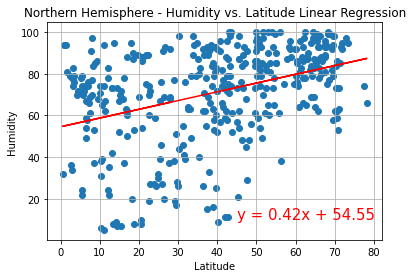

In [33]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Northern Hemisphere - Humidity vs. Latitude Linear Regression', (45,10))


The r-squared is: 0.02360532664098646


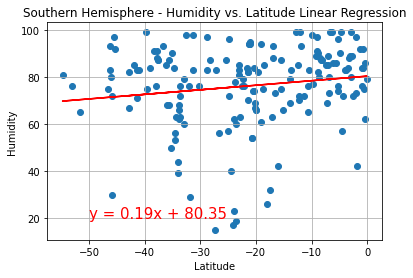

In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', 'Southern Hemisphere - Humidity vs. Latitude Linear Regression', (-50,20))


**Discussion about the linear relationship:** The linear regression plots for humidity vs. latitude in both the Northern and Southern hemispheres show a weak correlation. The r-squared values for both hemispheres indicate that less than 15% of the variation in humidity can be explained by latitude for the Northern Hemisphere, and less than 3% for the Southern Hemisphere. Therefore, we can conclude that latitude has a very small impact on humidity in both hemispheres. Other factors, such as proximity to bodies of water or prevailing winds, are likely to have a greater influence on humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05684913343666211


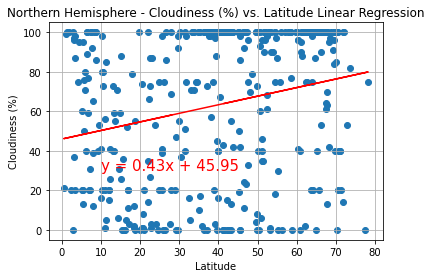

In [35]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", 
                       "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", (10,30))



The r-squared is: 0.12332158643059626


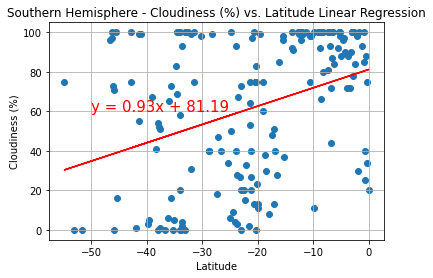

In [36]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", 
                       "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", (-50,60))

**Discussion about the linear relationship:** The linear regression analysis shows a weak positive correlation between cloudiness and latitude for both the northern and southern hemispheres. The low R-squared values suggest that latitude alone is not a strong predictor of cloudiness. Other factors such as local weather patterns and geography are likely to have a greater influence on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.04431816801586036


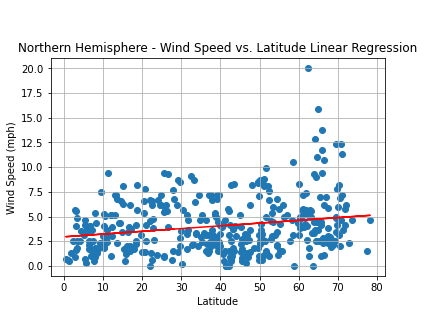

In [37]:
# Northern Hemisphere
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0,:]
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed (mph)', 'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression', (5,25))


The r-squared is: 0.11008170887981596


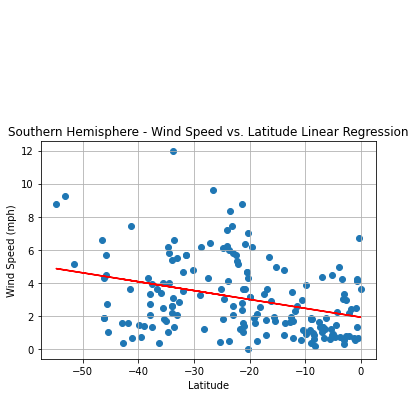

In [38]:
# Southern Hemisphere
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0,:]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed (mph)', 'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression', (-50,20))


**Discussion about the linear relationship:** For the Northern Hemisphere, there seems to be a weak negative linear relationship between wind speed and latitude, with an r-squared value of 0.04, indicating that only 4% of the data variability can be explained by the linear regression model. On the other hand, in the Southern Hemisphere, there is also a weak negative linear relationship between wind speed and latitude, with an r-squared value of 0.11, indicating that only 11% of the data variability can be explained by the linear regression model. However, based on the low r-squared values for both hemispheres, it can be concluded that there is no significant linear relationship between wind speed and latitude.